In [55]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [56]:
from matplotlib import pyplot as plt

In [57]:
df=pd.read_csv('Date and model wise sale.csv')

In [58]:
df.head(10)

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57
5,31-Aug-16,M100,59
6,31-Aug-16,M5,17
7,31-Aug-16,M14,653
8,31-Aug-16,M62,8
9,31-Aug-16,M15,25


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
Date     46116 non-null object
Model    46116 non-null object
Count    46116 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [60]:
df.describe()

,Count
count,46116.000000
mean,96.690108
std,315.065946
min,1.000000
25%,3.000000
50%,14.000000
75%,67.000000
max,6678.000000


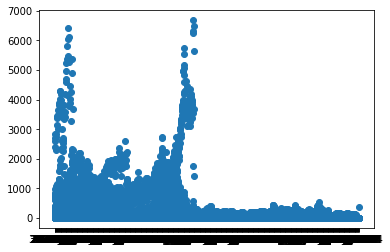

In [61]:
fig, ax = plt.subplots()
ax.scatter(df["Date"], df["Count"])

In [62]:
df.describe()

,Count
count,46116.000000
mean,96.690108
std,315.065946
min,1.000000
25%,3.000000
50%,14.000000
75%,67.000000
max,6678.000000


In [63]:
df.corr()

,Count
Count,1.0


In [64]:
from datetime import datetime

In [66]:
df = pd.read_csv("Date and model wise sale.csv",
                
                 parse_dates=["Date"])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
Date     46116 non-null datetime64[ns]
Model    46116 non-null object
Count    46116 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ MB


In [68]:
df.Date.dtype


dtype('<M8[ns]')

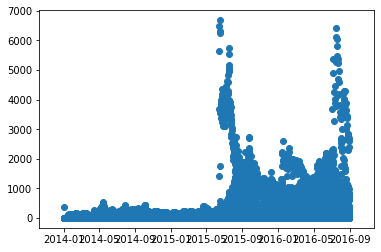

In [69]:
fig, ax = plt.subplots()
ax.scatter(df["Date"], df["Count"])

In [70]:
df

,Date,Model,Count
0,2016-08-31,M45,5
1,2016-08-31,M121,3
2,2016-08-31,M122,4
3,2016-08-31,M91,10
4,2016-08-31,M66,57
...,...,...,...
46111,2014-01-01,M74,1
46112,2014-01-01,M59,1
46113,2014-01-01,M60,5
46114,2014-01-01,M54,1


In [71]:
df.sort_values(by=["Date"], inplace=True, ascending=True)

df.Date.head(20)

46115   2014-01-01
46109   2014-01-01
46110   2014-01-01
46114   2014-01-01
46112   2014-01-01
46111   2014-01-01
46113   2014-01-01
46105   2014-01-02
46108   2014-01-02
46107   2014-01-02
46106   2014-01-02
46104   2014-01-03
46103   2014-01-04
46102   2014-01-04
46101   2014-01-07
46100   2014-01-07
46097   2014-01-09
46098   2014-01-09
46099   2014-01-09
46096   2014-01-10
Name: Date, dtype: datetime64[ns]

In [72]:
df_tmp = df.copy()

In [73]:
df_tmp["saleYear"] = df_tmp.Date.dt.year
df_tmp["saleMonth"] = df_tmp.Date.dt.month
df_tmp["saleDay"] = df_tmp.Date.dt.day
df_tmp["saleDayofweek"] = df_tmp.Date.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.Date.dt.dayofyear
df_tmp.drop("Date", axis=1, inplace=True)

In [74]:
df_tmp.head()

,Model,Count,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
46115,M58,1,2014,1,1,2,1
46109,M88,2,2014,1,1,2,1
46110,M55,384,2014,1,1,2,1
46114,M54,1,2014,1,1,2,1
46112,M59,1,2014,1,1,2,1


In [203]:

corr = df_tmp.corr()
corr['Count'].sort_values(ascending=False)

Count               1.000000
saleYear            0.043856
saleMonth           0.034535
saleDayofyear       0.034261
saleDayofweek      -0.000921
saleDay            -0.001421
Model              -0.075704
Model_is_missing         NaN
Name: Count, dtype: float64

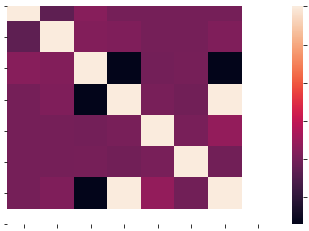

In [207]:
#plt.figure(figsize=(15,10))

sns.heatmap(df_tmp.corr(),annot=True)

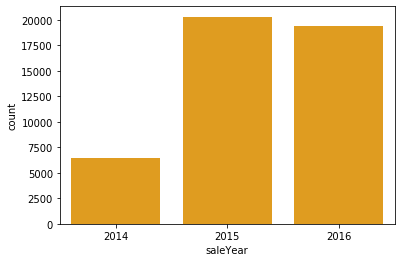

In [75]:
sns.countplot(x='saleYear', data=df_tmp, color='orange')

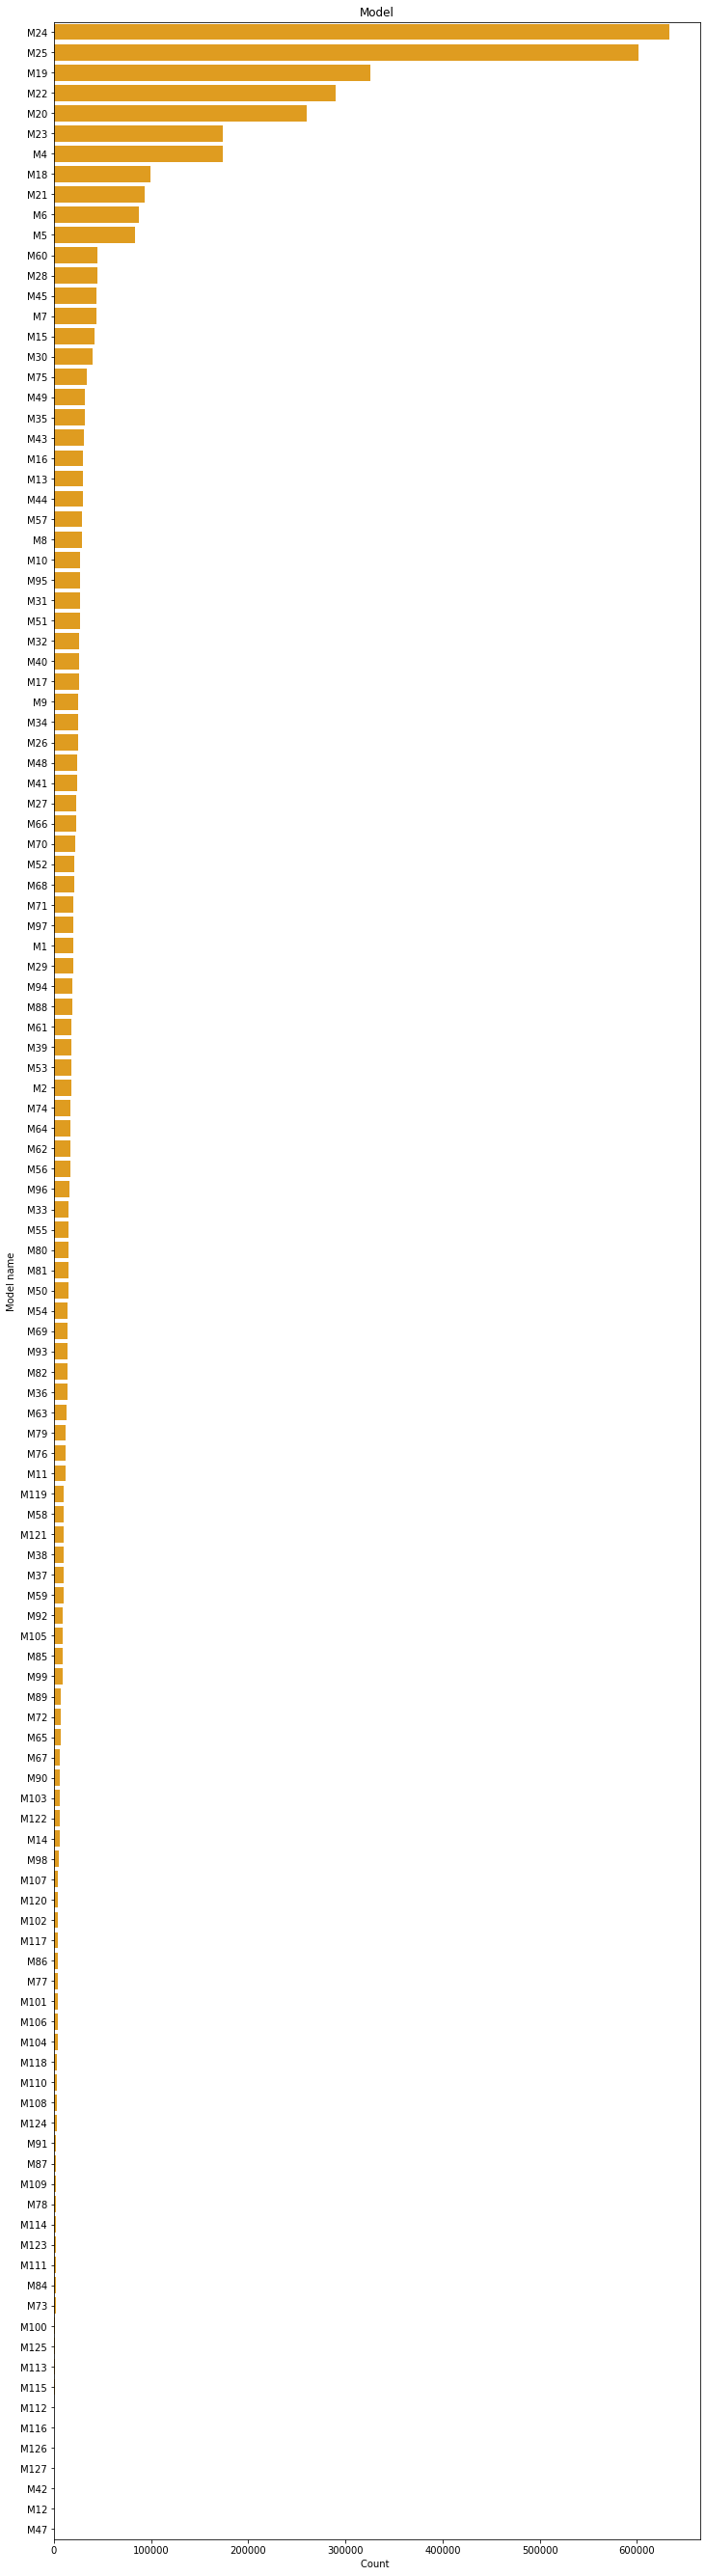

In [76]:
models_by_sale = df.groupby('Model')['Count'].sum()
models_by_sale.sort_values(axis=0, ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(12, 48))
ax=sns.barplot(models_by_sale, models_by_sale.index,orient='h', color='Orange')
ax.set(title='Model',xlabel='Count ', ylabel='Model name')
plt.show()

In [77]:
pd.api.types.is_string_dtype(df_tmp["Model"])

True

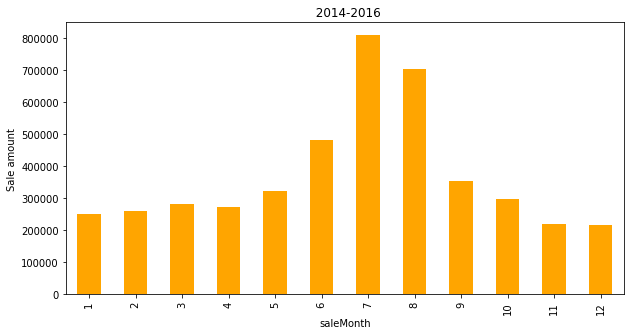

In [78]:
plt.figure(figsize=(10,5))
plt.title('  2014-2016')
plt.ylabel('Sale amount')
df_tmp.groupby('saleMonth').Count.sum().plot(kind='bar',color='orange')

(array([4.4513e+04, 1.0620e+03, 3.2300e+02, 7.5000e+01, 3.1000e+01,
        6.3000e+01, 2.5000e+01, 1.0000e+01, 7.0000e+00, 7.0000e+00]),
 array([1.0000e+00, 6.6870e+02, 1.3364e+03, 2.0041e+03, 2.6718e+03,
        3.3395e+03, 4.0072e+03, 4.6749e+03, 5.3426e+03, 6.0103e+03,
        6.6780e+03]),
 <a list of 10 Patch objects>)

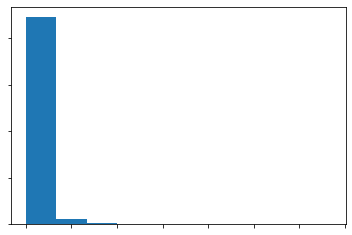

In [199]:

plt.hist(x=df["Count"])

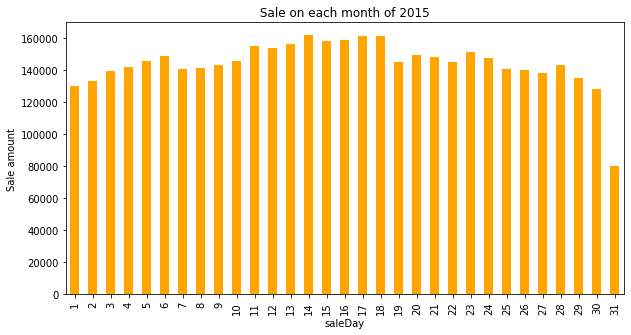

In [80]:
plt.figure(figsize=(10,5))
plt.title(' Sale on each month of 2015 ')
plt.ylabel('Sale amount')
df_tmp.groupby('saleDay').Count.sum().plot( kind='bar',color='orange')

In [82]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [83]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46116 entries, 46115 to 0
Data columns (total 7 columns):
Model            46116 non-null category
Count            46116 non-null int64
saleYear         46116 non-null int64
saleMonth        46116 non-null int64
saleDay          46116 non-null int64
saleDayofweek    46116 non-null int64
saleDayofyear    46116 non-null int64
dtypes: category(1), int64(6)
memory usage: 3.8 MB


In [84]:
df_tmp.to_csv("New_walton.csv",
              index=False)

In [85]:
df_tmp = pd.read_csv("New_walton.csv",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
Model,M58,M88,M55,M54,M59
Count,1,2,384,1,1
saleYear,2014,2014,2014,2014,2014
saleMonth,1,1,1,1,1
saleDay,1,1,1,1,1
saleDayofweek,2,2,2,2,2
saleDayofyear,1,1,1,1,1


In [86]:
for label, content in df_tmp.items():
   
    if not pd.api.types.is_numeric_dtype(content):
      
        df_tmp[label+"_is_missing"] = pd.isnull(content)
    
        df_tmp[label] = pd.Categorical(content).codes+1        

In [87]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 8 columns):
Model               46116 non-null int8
Count               46116 non-null int64
saleYear            46116 non-null int64
saleMonth           46116 non-null int64
saleDay             46116 non-null int64
saleDayofweek       46116 non-null int64
saleDayofyear       46116 non-null int64
Model_is_missing    46116 non-null bool
dtypes: bool(1), int64(6), int8(1)
memory usage: 2.2 MB


In [88]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(df_tmp.drop("Count", axis=1), df_tmp.Count)

/Users/salmanfarshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [89]:
model.score(df_tmp.drop("Count", axis=1), df_tmp.Count)

0.9930345082965555

In [90]:
df_tmp.saleYear.value_counts().sum()

46116

In [168]:

df_test = df_tmp[df_tmp.saleYear == 2015]
df_train = df_tmp[df_tmp.saleYear != 2015]

In [169]:
len(df_val)

20309

In [170]:
len(df_train)

25807

In [171]:
df_val+df_train

,Model,Count,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear,Model_is_missing
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
46111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
len(df_val)

20309

In [173]:
X_train, y_train = df_train.drop("Count", axis=1), df_train.Count
X_test, y_test = df_test.drop("Count", axis=1), df_val.Count

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((25807, 7), (25807,), (20000, 7), (20000,))

In [190]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Test RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Test R^2": model.score(X_valid, y_valid)}
    return scores

In [191]:
len(X_train)

25807

In [192]:
model = RandomForestRegressor(n_jobs=-1,
                      random_state=42)



In [193]:
model.fit(X_train, y_train)

/Users/salmanfarshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [194]:
show_scores(model)

{'Training MAE': 5.4421746037896686,
 'Test MAE': 8.030945,
 'Training RMSLE': 0.24296706016275885,
 'Test RMSLE': 0.4109093860636579,
 'Training R^2': 0.9933338804973311,
 'Test R^2': 0.9847891033414012}

In [195]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
show_scores(model)

{'Training MAE': 50.67534389894215,
 'Test MAE': 59.86277,
 'Training RMSLE': 1.2737644573412887,
 'Test RMSLE': 1.3734938920454094,
 'Training R^2': 0.7756939856601988,
 'Test R^2': 0.7692460870413595}

In [196]:
model = SVR()
model.fit(X_train, y_train)
show_scores(model)

/Users/salmanfarshi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'Training MAE': 87.55015427356942,
 'Test MAE': 100.46195701784595,
 'Training RMSLE': 1.6121244252756295,
 'Test RMSLE': 1.6882073401251878,
 'Training R^2': -0.0629757994972342,
 'Test R^2': -0.06537347606280752}